In [3]:
library(tidyverse)
library(mediation)
library(brms)
library(dplyr)

── Attaching core tidyverse packages ─────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


Warning messages:
1: package ‘tidyverse’ was built under R version 4.3.3 
2: package ‘lubridate’ was built under R version 4.3.2 


Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack

Loading required package: mvtnorm
Loading required package: sandwich
mediation: Causal Mediation Analysis
Version: 4.5.1



Warning messages:
1: package ‘mvtnorm’ was built under R version 4.3.3 
2: package ‘sandwich’ was built under R version 4.3.3 


Loading required package: Rcpp
Loading 'brms' package (version 2.22.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

Attaching package: ‘brms’

The following object is masked from ‘package:stats’:

    ar



Warning message:
package ‘brms’ was built under R version 4.3.3 


# Import Dataset

## Outcome Measures

### Short (for efficiency)

In [5]:
# -------------------------------
# 1. Define outcome measures (pre/post)
# -------------------------------
outcome_measures <- list(
  # Vascular
  fmd        = list(pre = "fmd_percent_pre", post = "fmd_percent_post"),
  # CPET
  vo2_rel    = list(pre = "cpet_vo2peak_relative_pre", post = "cpet_vo2peak_relative_post"),
  vo2_abs    = list(pre = "cpet_vo2peak_absolute_pre", post = "cpet_vo2peak_absolute_post"),
  vo2_perc   = list(pre = "cpet_vo2max_percentpredicted_pre", post = "cpet_vo2max_percentpredicted_post"),
  # Respiratory
  mip_pre    = list(pre = "mip_pre_max_pre", post = "mip_pre_max_post"),
  mip_post   = list(pre = "mip_post_max_pre", post = "mip_post_max_post"),
  smip_pre   = list(pre = "smip_pre_max_pre", post = "smip_pre_max_post"),
  smip_post  = list(pre = "smip_post_max_pre", post = "smip_post_max_post"),
  pif_pre    = list(pre = "pif_pre_max_pre", post = "pif_pre_max_post"),
  pif_post   = list(pre = "pif_post_max_pre", post = "pif_post_max_post"),
  sindex_pre = list(pre = "sindex_pre_max_pre", post = "sindex_pre_max_post"),
  sindex_post= list(pre = "sindex_post_max_pre", post = "sindex_post_max_post"),
  # Subjective
  fss        = list(pre = "fss_sum_pre", post = "fss_sum_post"),
  dsq        = list(pre = "dsq_sum_pre", post = "dsq_sum_post"),
  woods      = list(pre = "woods_sum_pre", post = "woods_sum_post"),
  vas_fatigue= list(pre = "vas_fatiguecurrent_pre", post = "vas_fatiguecurrent_post"),
  psqi       = list(pre = "psqi_sum_pre", post = "psqi_sum_post"),
  sfpa       = list(pre = "sfpa_sum_pre", post = "sfpa_sum_post")
)

### Full

In [10]:
# -------------------------------
# 1. Define outcome measures (pre/post)
# -------------------------------
outcome_measures <- list(
  # Vascular measures
  fmd_percent = list(pre = "fmd_percent_pre", post = "fmd_percent_post"),
  fmd_diameter_baseline = list(pre = "fmd_diameter_baseline_pre", post = "fmd_diameter_baseline_post"),
  fmd_diameter_maximum = list(pre = "fmd_diameter_maximum_pre", post = "fmd_diameter_maximum_post"),
  fmd_shear_baseline = list(pre = "fmd_shear_baseline_pre", post = "fmd_shear_baseline_post"),
  fmd_shear_maximum = list(pre = "fmd_shear_maximum_pre", post = "fmd_shear_maximum_post"),
  fmd_velocity_baseline = list(pre = "fmd_velocity_baseline_pre", post = "fmd_velocity_baseline_post"),
  fmd_velocity_maximum = list(pre = "fmd_velocity_maximum_pre", post = "fmd_velocity_maximum_post"),
  fmd_shear_areatomaximum = list(pre = "fmd_shear_areatomaximum_pre", post = "fmd_shear_areatomaximum_post"),
  fmd_shear_auc = list(pre = "fmd_shear_auc_pre", post = "fmd_shear_auc_post"),
  cpet_sbp_sitting = list(pre = "cpet_sbp_sitting_pre", post = "cpet_sbp_sitting_post"),
  cpet_dbp_sitting = list(pre = "cpet_dbp_sitting_pre", post = "cpet_dbp_sitting_post"),
  
  # CPET Measures
  cpet_vo2peak_relative = list(pre = "cpet_vo2peak_relative_pre", post = "cpet_vo2peak_relative_post"),
  cpet_vo2peak_predicted = list(pre = "cpet_vo2peak_predicted_pre", post = "cpet_vo2peak_predicted_post"),
  cpet_vo2peak_percentpredicted = list(pre = "cpet_vo2peak_percentpredicted_pre", post = "cpet_vo2peak_percentpredicted_post"),
  cpet_vo2peak_absolute = list(pre = "cpet_vo2peak_absolute_pre", post = "cpet_vo2peak_absolute_post"),
  cpet_ve = list(pre = "cpet_ve_pre", post = "cpet_ve_post"),
  cpet_rer = list(pre = "cpet_rer_pre", post = "cpet_rer_post"),
  cpet_o2pulse = list(pre = "cpet_o2pulse_pre", post = "cpet_o2pulse_post"),
  cpet_vt_peak = list(pre = "cpet_vt_peak_pre", post = "cpet_vt_peak_post"),
  cpet_rr_peak = list(pre = "cpet_rr_peak_pre", post = "cpet_rr_peak_post"),
  cpet_hr_peak = list(pre = "cpet_hr_peak_pre", post = "cpet_hr_peak_post"),
  cpet_oues = list(pre = "cpet_oues_pre", post = "cpet_oues_post"),
  
  # Fatigue/Brain Fog Measures
  fss_sum = list(pre = "fss_sum_pre", post = "fss_sum_post"),
  dsq_sum = list(pre = "dsq_sum_pre", post = "dsq_sum_post"),
  woods_sum = list(pre = "woods_sum_pre", post = "woods_sum_post"),
  vas_fatiguebest = list(pre = "vas_fatiguebest_pre", post = "vas_fatiguebest_post"),
  vas_fatigueworst = list(pre = "vas_fatigueworst_pre", post = "vas_fatigueworst_post"),
  vas_fatiguecurrent = list(pre = "vas_fatiguecurrent_pre", post = "vas_fatiguecurrent_post"),

  # Sleep Measures
  psqi_sum = list(pre = "psqi_sum_pre", post = "psqi_sum_post"),
  psqi_quality = list(pre = "psqi_quality_pre", post = "psqi_quality_post"),
  psqi_latency = list(pre = "psqi_latency_pre", post = "psqi_latency_post"),
  psqi_duration = list(pre = "psqi_duration_pre", post = "psqi_duration_post"),
  psqi_efficiency = list(pre = "psqi_efficiency_pre", post = "psqi_efficiency_post"),
  psqi_disturbances = list(pre = "psqi_disturbances_pre", post = "psqi_disturbances_post"),
  psqi_medication = list(pre = "psqi_medication_pre", post = "psqi_medication_post"),
  psqi_dysfunction = list(pre = "psqi_dysfunction_pre", post = "psqi_dysfunction_post"),

  # Dyspnea Measures
  mmrc_score = list(pre = "mmrc_score_pre", post = "mmrc_score_post"),

  # MSK Measures
  odi_sum = list(pre = "odi_sum_pre", post = "odi_sum_post"),
  ndi_sum = list(pre = "ndi_sum_pre", post = "ndi_sum_post"),
  vas_backpainbest = list(pre = "vas_backpainbest_pre", post = "vas_backpainbest_post"),
  vas_backpainworst = list(pre = "vas_backpainworst_pre", post = "vas_backpainworst_post"),
  vas_backpaincurrent = list(pre = "vas_backpaincurrent_pre", post = "vas_backpaincurrent_post"),
  vas_neckpainbest = list(pre = "vas_neckpainbest_pre", post = "vas_neckpainbest_post"),
  vas_neckpainworst = list(pre = "vas_neckpainworst_pre", post = "vas_neckpainworst_post"),
  vas_neckpaincurrent = list(pre = "vas_neckpaincurrent_pre", post = "vas_neckpaincurrent_post"),
  vas_myalgiabest = list(pre = "vas_myalgiabest_pre", post = "vas_myalgiabest_post"),
  vas_myalgiaworst = list(pre = "vas_myalgiaworst_pre", post = "vas_myalgiaworst_post"),
  vas_myalgiacurrent = list(pre = "vas_myalgiacurrent_pre", post = "vas_myalgiacurrent_post"),
  vas_dizzybest = list(pre = "vas_dizzybest_pre", post = "vas_dizzybest_post"),
  vas_dizzyworst = list(pre = "vas_dizzyworst_pre", post = "vas_dizzyworst_post"),
  vas_dizzycurrent = list(pre = "vas_dizzycurrent_pre", post = "vas_dizzycurrent_post"),

  # Functional Activity Measures
  sfpa_sum = list(pre = "sfpa_sum_pre", post = "sfpa_sum_post"), 
  pcfs_score = list(pre = "pcfs_score_pre", post = "pcfs_score_post"),
  eq_vas = list(pre = "eq_vas_pre", post = "eq_vas_post"),

  # Psychological Measures
  anxiety_sum = list(pre = "anxiety_sum_pre", post = "anxiety_sum_post"),
  anxiety_dichotomous = list(pre = "anxiety_dichotomous_pre", post = "anxiety_dichotomous_post"),
  depression_sum = list(pre = "depression_sum_pre", post = "depression_sum_post"),
  depression_dichotomous = list(pre = "depression_dichotomous_pre", post = "depression_dichotomous_post"),
  ptsd_sum = list(pre = "ptsd_sum_pre", post = "ptsd_sum_post"),
  ptsd_dichotomous = list(pre = "ptsd_dichotomous_pre", post = "ptsd_dichotomous_post"),
  
  # Respiratory measures
  mip_pre_max = list(pre = "mip_pre_max_pre", post = "mip_pre_max_post"),
  mip_post_max = list(pre = "mip_post_max_pre", post = "mip_post_max_post"),
  smip_pre_max = list(pre = "smip_pre_max_pre", post = "smip_pre_max_post"),
  smip_post_max = list(pre = "smip_post_max_pre", post = "smip_post_max_post"),
  pif_pre_max = list(pre = "pif_pre_max_pre", post = "pif_pre_max_post"),
  pif_post_max = list(pre = "pif_post_max_pre", post = "pif_post_max_post"),
  sindex_pre_max = list(pre = "sindex_pre_max_pre", post = "sindex_pre_max_post"),
  sindex_post_max = list(pre = "sindex_post_max_pre", post = "sindex_post_max_post"),
  fit_pre_max = list(pre = "fit_pre_max_pre", post = "fit_pre_max_post"),
  fit_post_max = list(pre = "fit_post_max_pre", post = "fit_post_max_post"),
  volume_pre_max = list(pre = "volume_pre_max_pre", post = "volume_pre_max_post"),
  volume_post_max = list(pre = "volume_post_max_pre", post = "volume_post_max_post"),

  # Autonomic Measures
  hrv_sdnn = list(pre = "hrv_sdnn_pre", post = "hrv_sdnn_post"),
  hrv_rmssd = list(pre = "hrv_rmssd_pre", post = "hrv_rmssd_post"),
  hrv_heartrate = list(pre = "hrv_heartrate_pre", post = "hrv_heartrate_post"),
  hrv_lfhf = list(pre = "hrv_lfhf_pre", post = "hrv_lfhf_post"),
  cpet_hrr1 = list(pre = "cpet_hrr1_pre", post = "cpet_hrr1_post"),
  cpet_hrr2 = list(pre = "cpet_hrr2_pre", post = "cpet_hrr2_post"),
  cpet_chronindex = list(pre = "cpet_chronindex_pre", post = "cpet_chronindex_post")
)

Warning message:
In file(out, "wt") :
  cannot open file 'C:\Users\ZCooper\AppData\Local\Temp\RtmpWKIHDT\file779828ab4f15.html': No such file or directory


In [ ]:
## Create Wide Table

In [11]:

# Import
df_long <- read.csv("C:/Users/ZCooper/Documents/GitHub/longcovid/df_RCT.csv")

# Programmatically extract all raw column names from outcome_measures
all_columns_raw <- unique(unlist(lapply(outcome_measures, function(x) c(x$pre, x$post))))
# But remove the _pre/_post suffix, since df_long doesn't have it yet
all_columns_raw <- gsub("_pre$", "", all_columns_raw)
all_columns_raw <- gsub("_post$", "", all_columns_raw)

# 3a. Pivot long → wide
df <- df_long %>%
  pivot_wider(
    id_cols = c(record_id, interventiongroup),
    names_from = time_point,
    values_from = all_of(all_columns_raw)
  )

# 3b. Rename columns (_1 → _pre, _2 → _post)
df <- df %>%
  rename_with(~ str_replace(.x, "_1$", "_pre")) %>%
  rename_with(~ str_replace(.x, "_2$", "_post"))


## Export

In [12]:
write.csv(df, "df_RCT_wide.csv", row.names = FALSE)

# Frequentist Mediation

## ANCOVA


Mediator model (summary):
# A tibble: 3 × 7
  term              estimate std.error statistic  p.value conf.low conf.high
  <chr>                <dbl>     <dbl>     <dbl>    <dbl>    <dbl>     <dbl>
1 (Intercept)         33.8      20.3        1.67 0.123     -10.8       78.4 
2 mip_pre_max_pre      0.487     0.445      1.10 0.297      -0.491      1.47
3 interventiongroup   61.3      13.5        4.55 0.000833   31.6       90.9 

Outcome model (summary):
# A tibble: 5 × 7
  term              estimate std.error statistic p.value conf.low conf.high
  <chr>                <dbl>     <dbl>     <dbl>   <dbl>    <dbl>     <dbl>
1 (Intercept)        17.6       21.5       0.817  0.435  -31.1       66.3  
2 fss_sum_pre         0.697      0.285     2.45   0.0368   0.0533     1.34 
3 mip_pre_max_post    0.0876     0.161     0.545  0.599   -0.276      0.451
4 mip_pre_max_pre    -0.359      0.253    -1.42   0.189   -0.931      0.213
5 interventiongroup  -9.21      12.2      -0.754  0.470  -36.9       1

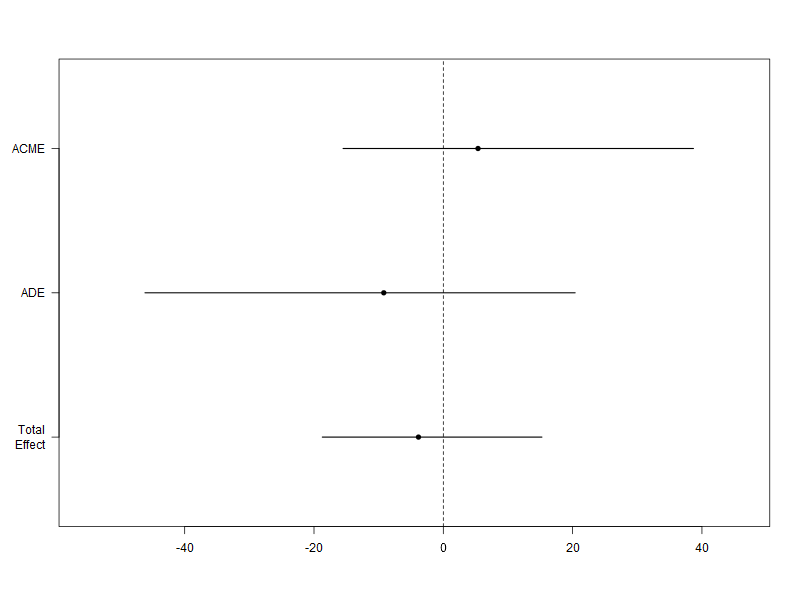

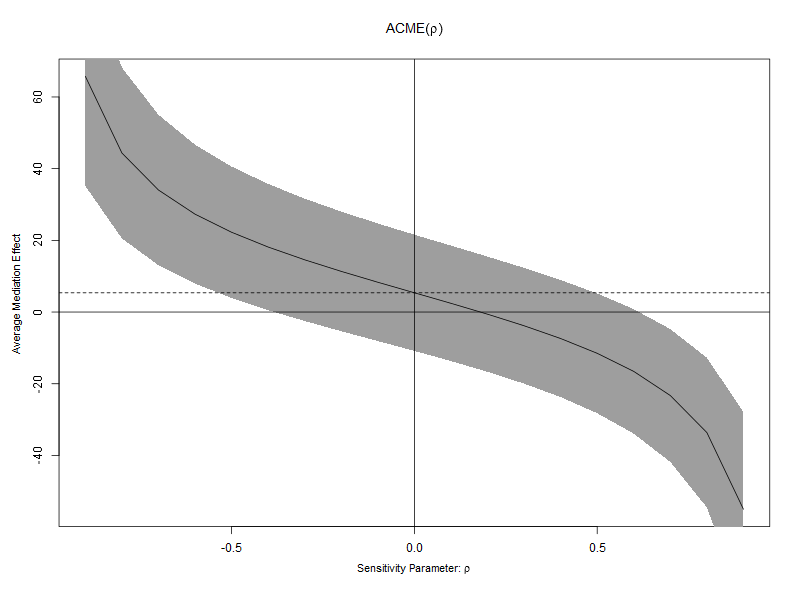

In [59]:
# Packages (install if needed)
# install.packages(c("mediation","broom"))
library(mediation)
library(broom)

# ---- 1. Quick checks & prepare data ----
# change these names if you want a different pair
mediator_post  <- "mip_pre_max_post"
mediator_pre   <- "mip_pre_max_pre"
outcome_post   <- "fss_sum_post"
outcome_pre    <- "fss_sum_pre"
treat_var      <- "interventiongroup"

# Ensure columns exist
missing_vars <- setdiff(c(mediator_post, mediator_pre, outcome_post, outcome_pre, treat_var), colnames(df))
if(length(missing_vars) > 0) stop("Missing variables in df: ", paste(missing_vars, collapse = ", "))

# Ensure treatment is numeric 0/1
if(!is.numeric(df[[treat_var]])) {
  # try to coerce factors to 0/1
  if(is.factor(df[[treat_var]])) {
    levs <- levels(df[[treat_var]])
    message("Coercing factor treatment to numeric 0/1 using first two levels: ", paste(levs[1:min(2,length(levs))], collapse = ", "))
    df[[treat_var]] <- as.numeric(df[[treat_var]]) - 1
  } else {
    df[[treat_var]] <- as.numeric(df[[treat_var]])
  }
}

# ---- 2. Fit the component models (ANCOVA-style) ----
# Mediator model: mediator_post ~ mediator_pre + treatment
med_formula <- as.formula(paste0(mediator_post, " ~ ", mediator_pre, " + ", treat_var))
model.M <- lm(med_formula, data = df)

# Outcome model: outcome_post ~ outcome_pre + mediator_post + mediator_pre + treatment
out_formula <- as.formula(paste0(outcome_post, " ~ ", outcome_pre, " + ", mediator_post, " + ", mediator_pre, " + ", treat_var))
model.Y <- lm(out_formula, data = df)

# Quick model checks
cat("\nMediator model (summary):\n"); print(broom::tidy(model.M, conf.int = TRUE))
cat("\nOutcome model (summary):\n");  print(broom::tidy(model.Y, conf.int = TRUE))

# ---- 3. Run mediation (Imai et al.) ----
set.seed(123)  # reproducible bootstrap
med_out <- mediate(model.M, model.Y,
                   treat = treat_var,
                   mediator = mediator_post,
                   boot = TRUE,
                   sims = 5000)   # increase sims if you want more precision

# ---- 4. Print results ----
summary(med_out)

# Useful pieces:
# med_out$d0        -> ACME (average causal mediation effect)
# med_out$tau.coef  -> total effect
# med_out$z0        -> ADE (direct effect, sometimes labeled differently)
# med_out$n0        -> proportion mediated (when defined)

# ---- 5. Plot mediation results ----
# simple plot of ACME/ADE CIs
plot(med_out)           # forest-like plots (ACME, ADE, total)

# ---- 6. Sensitivity analysis (how strong unobserved confounding must be) ----
sens <- medsens(med_out, rho.by = 0.1, sims = 1000)
print(sens)
plot(sens)


In [11]:
# View
View(tidy_results)

In [46]:
# 6. Run frequentist mediation loop
# -------------------------------
mediation_results <- data.frame(
  mediator = character(),
  outcome = character(),
  ACME = numeric(),
  ACME_p = numeric(),
  ADE = numeric(),
  ADE_p = numeric(),
  total_effect = numeric(),
  prop_mediated = numeric(),
  stringsAsFactors = FALSE
)

for (med in objective_changes) {
  for (out in all_changes) {
    
    if (med == out) next
    
    # Fit mediator model
    med_model <- lm(as.formula(paste0(med, " ~ interventiongroup")), data = df)
    
    # Fit outcome model
    out_model <- lm(as.formula(paste0(out, " ~ ", med, " + interventiongroup")), data = df)
    
    # Run mediation with bootstrapping
    med_fit <- mediate(med_model, out_model,
                       treat = "interventiongroup",
                       mediator = med,
                       boot = TRUE, sims = 5000)
    
    # Extract results
    res <- data.frame(
      mediator = med,
      outcome = out,
      ACME = med_fit$d0,
      ACME_p = med_fit$d0.p,
      ADE = med_fit$z0,
      ADE_p = med_fit$z0.p,
      total_effect = med_fit$tau.coef,
      prop_mediated = med_fit$n0
    )
    
    mediation_results <- bind_rows(mediation_results, res)
  }
}

Running nonparametric bootstrap

Running nonparametric bootstrap

Running nonparametric bootstrap



Warning messages:
1: In predict.lm(new.fit.M, type = "response", newdata = pred.data.t) :
  prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
2: In predict.lm(new.fit.Y, type = "response", newdata = pred.data.t) :
  prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
3: In predict.lm(new.fit.Y, type = "response", newdata = pred.data.c) :
  prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
4: In predict.lm(new.fit.Y, type = "response", newdata = pred.data.t) :
  prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
5: In predict.lm(new.fit.Y, type = "response", newdata = pred.data.t) :
  prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases


: Error in `mediate()`:
! number of observations do not match between mediator and outcome models

# Bayesian Mediation

In [5]:
library(brms)
library(dplyr)

# Define your lists of mediators and outcomes (change scores)
mediators <- c(
  "mip_pre_max_change", "mip_post_max_change",
  "smip_pre_max_change", "smip_post_max_change",
  "pif_pre_max_change", "pif_post_max_change",
  "sindex_pre_max_change", "sindex_post_max_change",
  "fmd_percent_change", "cpet_vo2peak_relative_change",
  "cpet_vo2peak_absolute_change", "cpet_vo2max_percentpredicted_change"
)

outcomes <- c(
  "fss_sum_change", "dsq_sum_change", "woods_sum_change",
  "vas_fatiguecurrent_change", "psqi_sum_change", "sfpa_sum_change"
)

# Prepare an empty list to store results
mediation_results <- list()

# Loop over mediators and outcomes
for (med in mediators) {
  for (out in outcomes) {
    cat("Running Bayesian mediation for mediator:", med, "→ outcome:", out, "\n")
    
    # Fit mediator model
    fit_M <- brm(
      formula = as.formula(paste(med, "~ interventiongroup")),
      data = df,
      family = gaussian(),
      prior = c(
        prior(normal(0, 10), class = "Intercept"),
        prior(normal(0, 1), class = "b"),
        prior(student_t(3, 0, 1), class = "sigma")
      ),
      chains = 4, iter = 4000, cores = 4, refresh = 0
    )
    
    # Fit outcome model
    fit_Y <- brm(
      formula = as.formula(paste(out, "~ interventiongroup +", med)),
      data = df,
      family = gaussian(),
      prior = c(
        prior(normal(0, 10), class = "Intercept"),
        prior(normal(0, 1), class = "b"),
        prior(student_t(3, 0, 1), class = "sigma")
      ),
      chains = 4, iter = 4000, cores = 4, refresh = 0
    )
    
    # Extract posterior samples
    post_M <- as_draws_df(fit_M) %>% dplyr::select(starts_with("b_")) %>% rename(beta_M = 1)
    post_Y <- as_draws_df(fit_Y) %>% dplyr::select(starts_with("b_")) %>% rename(gamma = paste0("b_", med), beta_Y = "b_interventiongroup")
    
    post <- cbind(post_M, post_Y)
    
    # Calculate ACME, ADE, Total
    post <- post %>%
      mutate(
        ACME = beta_M * gamma,
        ADE  = beta_Y,
        Total = ACME + ADE
      )
    
    # Summarize posterior
    summary <- post %>%
      summarise(
        mediator = med,
        outcome = out,
        ACME_mean = mean(ACME),
        ACME_lower = quantile(ACME, 0.025),
        ACME_upper = quantile(ACME, 0.975),
        ADE_mean = mean(ADE),
        ADE_lower = quantile(ADE, 0.025),
        ADE_upper = quantile(ADE, 0.975),
        Total_mean = mean(Total),
        Total_lower = quantile(Total, 0.025),
        Total_upper = quantile(Total, 0.975)
      )
    
    mediation_results[[paste(med, out, sep = "_")]] <- summary
  }
}

# Combine all results into one dataframe
mediation_summary_df <- bind_rows(mediation_results)
mediation_summary_df


Running Bayesian mediation for mediator: mip_pre_max_change → outcome: fss_sum_change 


: Error:
! The following variables can neither be found in 'data' nor in 'data2':
'mip_pre_max_change'

In [5]:
mediators <- c("mip_pre_change", "mip_post_change", "smip_pre_change", "smip_post_change")
outcomes  <- c("fss_change", "dsq_change", "woods_change", "vas_fatigue_change", "psqi_change", "sfpa_change")

for (med in mediators) {
  for (out in outcomes) {
    formula_str <- paste0(out, " ~ ", med, " + interventiongroup")
    fit <- brm(as.formula(formula_str), data = df, chains = 4, iter = 2000)
    print(fit)
  }
}


Compiling Stan program...
Start sampling

SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.076 seconds (Warm-up)
Chain 1:                0.043 second

There were 24 warnings (use warnings() to see them)


## 8/16

In [ ]:
library(tidyverse)
library(brms)

# -------------------------------
# 1. Define outcome and mediator measures
# -------------------------------

# Subjective outcomes
outcome_measures <- list(
  fss        = list(pre = "fss_sum_pre", post = "fss_sum_post"),
  dsq        = list(pre = "dsq_sum_pre", post = "dsq_sum_post"),
  woods      = list(pre = "woods_sum_pre", post = "woods_sum_post"),
  vas_fatigue = list(pre = "vas_fatiguecurrent_pre", post = "vas_fatiguecurrent_post"),
  psqi       = list(pre = "psqi_sum_pre", post = "psqi_sum_post"),
  sfpa       = list(pre = "sfpa_sum_pre", post = "sfpa_sum_post")
)

# Objective mediators
mediator_measures <- list(
  mip_pre   = list(pre = "mip_pre_max_pre", post = "mip_pre_max_post"),
  mip_post  = list(pre = "mip_post_max_pre", post = "mip_post_max_post"),
  smip_pre  = list(pre = "smip_pre_max_pre", post = "smip_pre_max_post"),
  fmd       = list(pre = "fmd_percent_pre", post = "fmd_percent_post"),
  vo2_rel   = list(pre = "cpet_vo2peak_relative_pre", post = "cpet_vo2peak_relative_post")
)

# -------------------------------
# 2. Set priors (weakly informative for now)
# -------------------------------
priors <- c(
  prior(normal(0, 1), class = "b"),         
  prior(student_t(3, 0, 10), class = "sigma")
)

options(mc.cores = parallel::detectCores())  # parallelize chains

# -------------------------------
# 3. Loop through outcomes & mediators
# -------------------------------
results <- list()

for(outcome_name in names(outcome_measures)){
  outcome_post <- outcome_measures[[outcome_name]]$post
  outcome_pre  <- outcome_measures[[outcome_name]]$pre
  
  for(mediator_name in names(mediator_measures)){
    mediator_post <- mediator_measures[[mediator_name]]$post
    mediator_pre  <- mediator_measures[[mediator_name]]$pre
    
    # ANCOVA-style formula: post ~ mediator_post + mediator_pre + intervention
    formula_str <- paste0(outcome_post, " ~ ", mediator_post, " + ", mediator_pre, " + interventiongroup")
    
    fit <- brm(
      formula = as.formula(formula_str),
      data = df,
      prior = priors,
      chains = 4,
      iter = 2000,
      warmup = 1000,
      seed = 123,
      refresh = 0  # suppress verbose Stan output
    )
    
    # Save concise posterior summary
    results[[paste0(outcome_name, "_by_", mediator_name)]] <- posterior_summary(fit)
    
    cat("Finished model:", outcome_name, "by", mediator_name, "\n")
  }
}

# -------------------------------
# 4. Examine results
# -------------------------------
# Example: view FSS ~ MIP pre
results$fss_by_mip_pre



Compiling Stan program...
Start sampling
Finished model: fss by mip_pre 
Compiling Stan program...
Start sampling
Finished model: fss by mip_post 
Compiling Stan program...
Start sampling
Finished model: fss by smip_pre 
Compiling Stan program...
Start sampling
Finished model: fss by fmd 
Compiling Stan program...
Start sampling
Finished model: fss by vo2_rel 
Compiling Stan program...
Start sampling
Finished model: dsq by mip_pre 
Compiling Stan program...
Start sampling
Finished model: dsq by mip_post 
Compiling Stan program...
Start sampling
Finished model: dsq by smip_pre 
Compiling Stan program...
Start sampling
Finished model: dsq by fmd 
Compiling Stan program...
Start sampling
Finished model: dsq by vo2_rel 
Compiling Stan program...
Start sampling
Finished model: woods by mip_pre 
Compiling Stan program...
Start sampling
Finished model: woods by mip_post 
Compiling Stan program...
Start sampling
Finished model: woods by smip_pre 
Compiling Stan program...
Start sampling
Finish

There were 30 warnings (use warnings() to see them)


In [8]:
# Optional: combine all into a table for export
write.csv(do.call(rbind, results), "bayes_ancova_mediation_results.csv")


# HLM Mediation

## Frequentist

In [57]:
library(lme4)
library(mediation)

# Mediator model
med.fit <- lmer(mip_post_max_percentpredict_2 ~ time_point + (1 | record_id), data = df_long)

# Outcome model
out.fit <- lmer(fss_sum ~ time_point + mip_post_max_percentpredict_2 + (1 | record_id), data = df_long)

# Mediation analysis (no boot)
med.out <- mediate(
  model.m = med.fit,
  model.y = out.fit,
  treat = "time_point",
  mediator = "mip_post_max_percentpredict_2",
  sims = 1000  # parametric simulations
)

print(summary(med.out))



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -6.42985    -11.58699     -2.45444  <2e-16 ***
ADE             -4.50146    -11.02956      2.11711   0.198    
Total Effect   -10.93131    -17.40136     -4.45947  <2e-16 ***
Prop. Mediated   0.58989      0.21289      1.35772  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 37 


Simulations: 1000 



## Path Analysis

In [61]:
library(lme4)
library(mediation)
library(dplyr)

# Make sure your df_long has these columns:
# record_id, time_point, fss_sum, mip_pre_max, fmd_percent

# -----------------------------
# Mediator 1: MIP
med_mip <- lmer(mip_pre_max ~ time_point + (1 | record_id), data = df_long)

# Mediator 2: FMD_percent
med_fmd <- lmer(fmd_percent ~ time_point + (1 | record_id), data = df_long)

# Outcome model including both mediators
outcome_model <- lmer(woods_sum ~ time_point + mip_pre_max + fmd_percent + (1 | record_id),
                      data = df_long)

# -----------------------------
# Mediation analysis for MIP (controlling for FMD as a covariate)
med_out_mip <- mediate(
  model.m = med_mip,
  model.y = outcome_model,
  treat = "time_point",
  mediator = "mip_pre_max",
  sims = 1000
)

# Mediation analysis for FMD (controlling for MIP as a covariate)
med_out_fmd <- mediate(
  model.m = med_fmd,
  model.y = outcome_model,
  treat = "time_point",
  mediator = "fmd_percent",
  sims = 1000
)

# -----------------------------
# Print summaries
print(summary(med_out_mip))
print(summary(med_out_fmd))




Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value  
ACME           -3.167220    -7.191070     0.096995   0.064 .
ADE            -0.078721    -4.822166     4.740936   0.976  
Total Effect   -3.245941    -7.846144     1.163491   0.170  
Prop. Mediated  0.861602    -5.227600     6.885031   0.206  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 37 


Simulations: 1000 


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value
ACME           -1.392088    -4.597790     0.983259   0.234
ADE            -0.033462    -4.927719     4.712802   0.994
Total Effect   -1.425550    -6.594648     3.272933   0.626
Pro


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value   
ACME            -5.30667    -11.79027     -0.12237   0.046 * 
ADE             -5.33386    -13.68350      2.59860   0.182   
Total Effect   -10.64053    -17.50798     -4.50628   0.006 **
Prop. Mediated   0.50332     -0.00336      1.38359   0.052 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 37 


Simulations: 1000 



# End